<a href="https://colab.research.google.com/github/ipeirotis/dealing_with_data/blob/master/03-Pandas/B1-Pandas_Reading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

## Setup and preliminaries

Install the necessary libraries to connect to MySQL and to read Excel files

In [1]:
!sudo pip3 install -U -q PyMySQL sqlalchemy sql_magic xlrd

     |████████████████████████████████| 43 kB 1.5 MB/s 
     |████████████████████████████████| 96 kB 4.0 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

Pandas offers the ability to read and write from/to many different data types. We list a few examples below, and we have a [small example](https://github.com/ipeirotis/dealing_with_data/blob/master/03-Pandas/E2-Reading_from_Web_Pages.ipynb) where we read directly tables from web pages. The [official documentation](https://pandas.pydata.org/docs/reference/io.html) has the full list.

## Loading data from MySQL Server using the `read_sql` command

### DOH Restaurant Inspections

We start by setting up the connection to the MySQL server that we want to use.

In [3]:
import os
from sqlalchemy import create_engine

conn_string = 'mysql+pymysql://{user}:{password}@{host}/{db}?charset=utf8mb4'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    password = 'dwdstudent2015', 
    db = 'doh_restaurants',
    encoding = 'utf8mb4')

mysql_conn = create_engine(conn_string).connect()

We fetch the results of the query using the `read_sql` command.

In [4]:
# This query returns back the restaurants in the DOH database
sql = '''
	SELECT R.CAMIS, R.DBA, R.BUILDING, R.STREET, R.ZIPCODE, R.BORO, 
          R.CUISINE_DESCRIPTION, R.LATITUDE, R.LONGITUDE
		FROM doh_restaurants.restaurants R

'''
restaurants = pd.read_sql(sql, con=mysql_conn)

When you run your query using Pandas, you get back a kind of object called a DataFrame, which is made up of rows and columns. Let's take a look at how the object looks like:

In [5]:
restaurants

,CAMIS,DBA,BUILDING,STREET,ZIPCODE,BORO,CUISINE_DESCRIPTION,LATITUDE,LONGITUDE
0,30075445,MORRIS PARK BAKE SHOP,1007,MORRIS PARK AVENUE,10462,Bronx,Bakery Products/Desserts,40.8482,-73.8560
1,30112340,WENDY'S,469,FLATBUSH AVENUE,11225,Brooklyn,Hamburgers,40.6627,-73.9621
2,30191841,DJ REYNOLDS PUB AND RESTAURANT,351,WEST 57 STREET,10019,Manhattan,Irish,40.7673,-73.9843
3,40356018,RIVIERA CATERERS,2780,STILLWELL AVENUE,11224,Brooklyn,American,40.5799,-73.9821
4,40356483,WILKEN'S FINE FOOD,7114,AVENUE U,11234,Brooklyn,Sandwiches,40.6201,-73.9070
...,...,...,...,...,...,...,...,...,...
18903,50117158,CHINA CITY RESTAURANT,308,EAST 188 STREET,10458,Bronx,Chinese,40.8607,-73.8951
18904,50117251,DAN AND JOHN'S WINGS,445,ALBEE SQUARE,11201,Brooklyn,Chicken,40.6908,-73.9835
18905,50117350,SONG TEA,488,7 AVENUE,10018,Manhattan,Coffee/Tea,40.7525,-73.9895
18906,50117959,SOL MAYA RESTAURANT,2061,2 AVENUE,10029,Manhattan,American,40.7905,-73.9425


## Loading a CSV file using the `read_csv` command

### 2018 Central Park Squirrel Census

Let's get the [2018 Central Park Squirrel Census](https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw)

In [6]:
# Option 1: Download the CSV dataset using 
# the "!curl" command (a Linux command line)
# To get the URL, go to "Export => CSV" and then copy the link
!curl https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD -o squirrel_census.csv
squirrels = pd.read_csv("squirrel_census.csv")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  730k    0  730k    0     0   553k      0 --:--:--  0:00:01 --:--:--  553k


In [38]:
# Option 2: Read the URL directly
# Fine for small datasets, not great when you have a big dataset and 
# may want to reload it repeatedly
url = 'https://data.cityofnewyork.us/api/views/vfnx-vebw/rows.csv?accessType=DOWNLOAD'
squirrels = pd.read_csv(url)

In [39]:
# The command below adds underscores in all column names and capitalizes them
cols = squirrels.columns.map(lambda x: x.replace(' ', '_').upper())
squirrels.columns = cols

In [40]:
# See https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
# for the meaning of the "format" variable
squirrels['DATE'] = pd.to_datetime(squirrels['DATE'], format='%m%d%Y')

In [41]:
# Delete the column "LAT/LONG"
squirrels = squirrels.drop(["LAT/LONG"], axis = "columns")

In [43]:
squirrels

,X,Y,UNIQUE_SQUIRREL_ID,HECTARE,SHIFT,DATE,HECTARE_SQUIRREL_NUMBER,AGE,PRIMARY_FUR_COLOR,HIGHLIGHT_FUR_COLOR,...,OTHER_ACTIVITIES,KUKS,QUAAS,MOANS,TAIL_FLAGS,TAIL_TWITCHES,APPROACHES,INDIFFERENT,RUNS_FROM,OTHER_INTERACTIONS
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,2018-10-19,4,NaN,NaN,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,2018-10-14,8,NaN,Gray,NaN,...,NaN,False,False,False,False,False,False,False,False,NaN
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,2018-10-17,14,Adult,Gray,NaN,...,NaN,False,False,False,False,False,False,False,True,NaN
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,2018-10-17,5,Adult,Gray,Cinnamon,...,NaN,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.963943,40.790868,30B-AM-1007-04,30B,AM,2018-10-07,4,Adult,Gray,NaN,...,NaN,False,False,False,False,False,False,False,True,NaN
3019,-73.970402,40.782560,19A-PM-1013-05,19A,PM,2018-10-13,5,Adult,Gray,White,...,NaN,False,False,False,False,False,False,True,False,NaN
3020,-73.966587,40.783678,22D-PM-1012-07,22D,PM,2018-10-12,7,Adult,Gray,"Black, Cinnamon, White",...,NaN,False,False,False,False,False,False,True,False,NaN
3021,-73.963994,40.789915,29B-PM-1010-02,29B,PM,2018-10-10,2,NaN,Gray,"Cinnamon, White",...,NaN,False,False,False,False,False,False,True,False,NaN


## Loading an Excel file using the `read_excel` command

### Titanic Dataset 

Let's now load the [Titanic dataset](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active) from an Excel file.



In [9]:
titanic_url = 'https://storage.googleapis.com/datasets_nyu/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


### Data Dictionary for DOH Restaurants dataset

In [44]:
url = 'https://data.cityofnewyork.us/api/views/43nn-pn8j/files/ec33d2c8-81f5-499a-a238-0213a38239cd?download=true&filename=RestaurantInspectionDataDictionary_09242018.xlsx'

In [52]:
restaurants_data_dictionary = pd.read_excel (url, sheet_name=1, header=1);

In [53]:
restaurants_data_dictionary.columns = ['Column_Name', 'Description', 'Code_Definitions', 'Notes']

In [ ]:
restaurants_data_dictionary

In [55]:
restaurants_data_dictionary = restaurants_data_dictionary.drop(0, axis='index')

In [ ]:
restaurants_data_dictionary

## Loading a "Fixed Width" file using the `read_fwf` command

### Accidental Deaths in the USA 

This [dataset](https://storage.googleapis.com/datasets_nyu/acc-deaths.txt) is in "fixed width" format  and contains the monthly totals of accidental deaths in the USA. 

In [105]:
deaths = pd.read_fwf("https://storage.googleapis.com/datasets_nyu/acc-deaths.txt")
deaths

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1973,9007,8106,8928,9137,10017,10826,11317,10744,9713,9938,9161,8927
1,1974,7750,6981,8038,8422,8714,9512,10120,9823,8743,9129,8710,8680
2,1975,8162,7306,8124,7870,9387,9556,10093,9620,8285,8466,8160,8034
3,1976,7717,7461,7767,7925,8623,8945,10078,9179,8037,8488,7874,8647
4,1977,7792,6957,7726,8106,8890,9299,10625,9302,8314,8850,8265,8796
5,1978,7836,6892,7791,8192,9115,9434,10484,9827,9110,9070,8633,9240


In [106]:
deaths.dtypes

Year    int64
Jan     int64
Feb     int64
Mar     int64
Apr     int64
May     int64
Jun     int64
Jul     int64
Aug     int64
Sep     int64
Oct     int64
Nov     int64
Dec     int64
dtype: object

#### Melt and Pivot_Table

Now we want to take the month-columns, and convert the file into a file with the format `<date>, <value>`.

The command for this is the [`melt`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) command. (For the opposite operation, use the pivot_table function.)

In [107]:
deaths = pd.melt(deaths, id_vars=['Year'], 
        value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        var_name='Month', value_name='Deaths')
deaths.head(10)

,Year,Month,Deaths
0,1973,Jan,9007
1,1974,Jan,7750
2,1975,Jan,8162
3,1976,Jan,7717
4,1977,Jan,7792
5,1978,Jan,7836
6,1973,Feb,8106
7,1974,Feb,6981
8,1975,Feb,7306
9,1976,Feb,7461


In [108]:
# The opposite of melt:
pd.pivot_table(
    data = deaths,
    index='Year',
    columns='Month',
    values = 'Deaths'
)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1973,9137,10744,8927,8106,9007,11317,10826,8928,10017,9161,9938,9713
1974,8422,9823,8680,6981,7750,10120,9512,8038,8714,8710,9129,8743
1975,7870,9620,8034,7306,8162,10093,9556,8124,9387,8160,8466,8285
1976,7925,9179,8647,7461,7717,10078,8945,7767,8623,7874,8488,8037
1977,8106,9302,8796,6957,7792,10625,9299,7726,8890,8265,8850,8314
1978,8192,9827,9240,6892,7836,10484,9434,7791,9115,8633,9070,9110


In [109]:
# Now, we want to merge the month and year columns, to create a Date column.
# Notice the use of .astype(str) function that converts the int64 datatype into a string.
# Without that function, we get an error message that we cannot add an integer (Year) with a string (Month)
deaths["Date"] = deaths["Month"] + "-" + deaths["Year"].astype(str)
deaths

,Year,Month,Deaths,Date
0,1973,Jan,9007,Jan-1973
1,1974,Jan,7750,Jan-1974
2,1975,Jan,8162,Jan-1975
3,1976,Jan,7717,Jan-1976
4,1977,Jan,7792,Jan-1977
...,...,...,...,...
67,1974,Dec,8680,Dec-1974
68,1975,Dec,8034,Dec-1975
69,1976,Dec,8647,Dec-1976
70,1977,Dec,8796,Dec-1977


In [110]:
# Convert the date column to a proper DateTime data type
deaths["Date"] = pd.to_datetime(deaths["Date"], format='%b-%Y')
deaths

,Year,Month,Deaths,Date
0,1973,Jan,9007,1973-01-01
1,1974,Jan,7750,1974-01-01
2,1975,Jan,8162,1975-01-01
3,1976,Jan,7717,1976-01-01
4,1977,Jan,7792,1977-01-01
...,...,...,...,...
67,1974,Dec,8680,1974-12-01
68,1975,Dec,8034,1975-12-01
69,1976,Dec,8647,1976-12-01
70,1977,Dec,8796,1977-12-01


In [111]:
# Now, that we have the Date column, we can delete the month and year columns.
# Notice the axis='columns' part: this means that we drop a column with that name. 
# If we used axis='rows', then Pandas would have been looking for a row with that key to drop.

deaths = deaths.drop(["Month","Year"], axis='columns')


In [112]:
# And now we convert the Date to be an index, so that it can be used as the x-axis for plotting the series.
deaths = deaths.set_index(keys="Date")


In [113]:
# Notice that the dates are not in order (we get the January's for all the 
# years first, then the February's etc). While this is not an issue with 
# plotting, this can be an issue for other types of analyses. 
# For this reason, we sort the index:

deaths = deaths.sort_index()

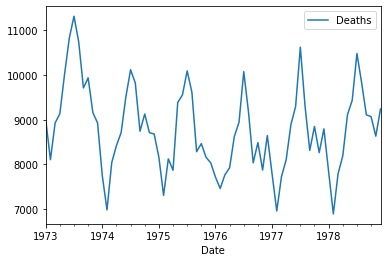

In [114]:
deaths.plot()

## Loading Tables from HTML Pages using the `read_html` command

### Retrieve Country Population From Wikipedia

In [11]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
df_list = pd.read_html(
            url, # Specify the page 
            match='Population', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match

2

In [12]:
df_population = df_list[0]
df_population

,Country/Area,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


In [13]:
# Remove the footnote notations in square brackets (eg., "[4]")
df_population = df_population.replace(
    to_replace = r'(.*)\[.\]',
    value = r'\1',
    regex=True
)

In [14]:
# Rename the columns
df_population.columns = ['Country', 'Region', 'Subegion', 'Population_2018', 'Population_2019', 'Change']

In [ ]:
# Keep only the columns we need
df_population = df_population.filter( items = ['Country', 'Population_2019'] )

In [16]:
df_population

,Country,Population_2019
0,China,1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318
...,...,...
229,Falkland Islands (United Kingdom),3377
230,Niue (New Zealand),1615
231,Tokelau (New Zealand),1340
232,Vatican City,799


### Retrieve Life Expectancy From Wikipedia

In [19]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy'
df_list = pd.read_html(
            url, # Specify the page 
            match='Life expectancy at birth', # Write a pattern that is unique to the table we are interested in
            header=0 # which line of the table to use as a header
        )

len(df_list) # check how many tables match


3

In [20]:
df_who=df_list[0] # get the first of the tables
df_who


,Countries,Life expectancy at birth,Life expectancy at birth.1,Life expectancy at birth.2,Life expectancy at birth.3,Life expectancy at birth.4,HALE at birth,HALE at birth.1,HALE at birth.2,HALE at birth.3,...,Life expectancy at age 60.1,Life expectancy at age 60.2,Life expectancy at age 60.3,Life expectancy at age 60.4,HALE at age 60,HALE at age 60.1,HALE at age 60.2,HALE at age 60.3,HALE at age 60.4,Unnamed: 21
0,Countries,All,M,F,FΔM,Δ2000,All,M,F,FΔM,...,M,F,FΔM,Δ2000,All,M,F,FΔM,Δ2000,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Japan,84.3,81.5,86.9,5.4,3.2,74.1,72.6,75.5,2.9,...,23.9,28.6,4.7,2.2,20.4,18.8,21.8,3.0,1.7,NaN
3,Switzerland,83.4,81.8,85.1,3.3,3.7,72.5,72.2,72.8,0.6,...,24.1,26.6,2.5,2.4,19.5,18.8,20.2,1.4,1.8,NaN
4,South Korea,83.3,80.3,86.1,5.8,7.1,73.1,71.3,74.7,3.4,...,23.4,27.9,4.5,5.1,19.8,18.2,21.2,3.0,3.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,Mozambique,58.1,54.5,61.7,7.2,7.4,50.4,47.9,52.8,4.9,...,13.3,17.8,4.5,0.6,11.6,9.8,13.0,3.2,0.6,NaN
182,Eswatini,57.7,53.4,63.2,9.8,10.7,50.1,47.1,53.8,6.7,...,12.4,17.7,5.3,1.5,11.0,9.0,12.9,3.9,1.1,NaN
183,Somalia,56.5,54.0,59.2,5.2,6.6,49.7,48.3,51.3,3.0,...,13.2,16.0,2.8,1.4,11.2,10.3,12.2,1.9,1.1,NaN
184,Central African Republic,53.1,50.2,56.3,6.1,8.8,46.4,44.5,48.4,3.9,...,11.3,14.9,3.6,1.4,10.0,8.6,11.1,2.5,1.1,NaN


In [21]:
# Keep only two columns
df_who = df_who.filter( items = ['Countries', 'Life expectancy at birth'] )
# Delete the first two lines of the dataset
df_who = df_who.drop([0,1])


In [22]:
# Convert the 'Life expectancy at birth' column to numeric
# and store it in a column called "Life_Expectancy"
df_who['Life_expectancy'] = pd.to_numeric(df_who['Life expectancy at birth'])
# Delete the original column
df_who = df_who.drop('Life expectancy at birth', axis='columns')


In [23]:
df_who

,Countries,Life_expectancy
2,Japan,84.3
3,Switzerland,83.4
4,South Korea,83.3
5,Singapore,83.2
6,Spain,83.2
...,...,...
181,Mozambique,58.1
182,Eswatini,57.7
183,Somalia,56.5
184,Central African Republic,53.1
